In [14]:
#import programs
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from numpy import random
from shapely.geometry import Point
%matplotlib inline

In [6]:
Firearm_Laws = pd.read_csv('State Firearm Laws 1991-2020.csv')

The State Firearm Law Database tracks the existence (1) or absense (0) of gun laws in all fifty United States from 1991-2020. This data was in final form and did not require any additional cleaning practices. We utilized this source to gain insights into regulatory variations across the country and to explore any geographical patterns that might emerge.

Citation:
Siegel, Michael. State Firearm Law Database: State Firearm Laws, 1991-2019. Inter-university Consortium for Political and Social Research [distributor], 2020-02-26. https://doi.org/10.3886/ICPSR37363.v1

In [7]:
Firearm_Laws.head()

,state,year,felony,invcommitment,invoutpatient,danger,drugmisdemeanor,alctreatment,alcoholism,relinquishment,...,expartedating,dvrosurrender,dvrosurrendernoconditions,dvrosurrenderdating,expartesurrender,expartesurrendernoconditions,expartesurrenderdating,dvroremoval,stalking,lawtotal
0,Alabama,1991,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,15
1,Alabama,1992,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,16
2,Alabama,1993,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,16
3,Alabama,1994,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,16
4,Alabama,1995,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,16


In [13]:
Firearm_Laws.isna().sum()

state                           0
year                            0
felony                          0
invcommitment                   0
invoutpatient                   0
                               ..
expartesurrendernoconditions    0
expartesurrenderdating          0
dvroremoval                     0
stalking                        0
lawtotal                        0
Length: 137, dtype: int64

In [11]:
selected_years = [2020, 2015, 2010, 2005, 2000]
annual_data_selected_years = Firearm_Laws[Firearm_Laws['year'].isin(selected_years)]
annual_data_selected_years

,state,year,felony,invcommitment,invoutpatient,danger,drugmisdemeanor,alctreatment,alcoholism,relinquishment,...,expartedating,dvrosurrender,dvrosurrendernoconditions,dvrosurrenderdating,expartesurrender,expartesurrendernoconditions,expartesurrenderdating,dvroremoval,stalking,lawtotal
9,Alabama,2000,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,11
14,Alabama,2005,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,11
19,Alabama,2010,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,11
24,Alabama,2015,0,1,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,10
29,Alabama,2020,0,1,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1479,Wyoming,2000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9
1484,Wyoming,2005,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9
1489,Wyoming,2010,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,12
1494,Wyoming,2015,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,8


To maintain relevance over the last twenty years with a consistent time span, we specifically investigated the years 2000, 2005, 2010, 2015, and 2020.

In [88]:
state_year_lawtotal = ['state', 'year', 'lawtotal']
lawtotal_analysis = annual_data_selected_years[state_year_lawtotal].copy()
lawtotal_analysis_2020 = lawtotal_analysis[lawtotal_analysis['year'] == 2020]
lawtotal_analysis_2015 = lawtotal_analysis[lawtotal_analysis['year'] == 2015]
lawtotal_analysis_2010 = lawtotal_analysis[lawtotal_analysis['year'] == 2010]
lawtotal_analysis_2005 = lawtotal_analysis[lawtotal_analysis['year'] == 2005]
lawtotal_analysis_2000 = lawtotal_analysis[lawtotal_analysis['year'] == 2000]

In [87]:
#numpy to calculate average total gun laws among all states per years listed
def calculate_avg_lawtotal(df):
    lawtotal_array = np.array(df['lawtotal'])
    return np.mean(lawtotal_array)

years = [2020, 2015, 2010, 2005, 2000]
avg_lawtotal_per_year = {}

for year in years:
    year_name = f"lawtotal_analysis_{year}"
    avg_lawtotal_per_year[year] = calculate_avg_lawtotal(globals()[year_name])
    
print(avg_lawtotal_per_year)

{2020: 29.44, 2015: 26.72, 2010: 24.98, 2005: 24.34, 2000: 23.92}


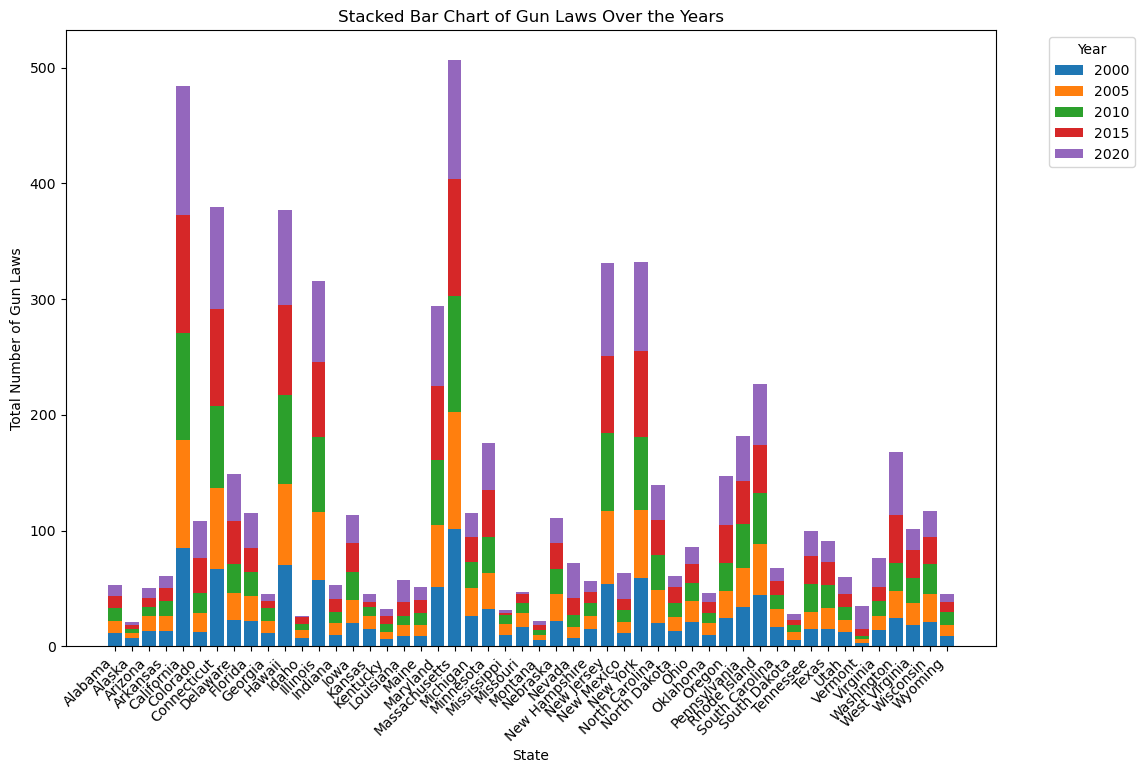

In [12]:
states = annual_data_selected_years['state'].unique()
years = sorted(annual_data_selected_years['year'].unique())

#store data for each year
year_dict = {year: annual_data_selected_years[annual_data_selected_years['year']== year]['lawtotal'].values for year in years}

#stacked bar chart
fig, ax = plt.subplots(figsize=(12,8))
bottom = np.zeros(len(states))

for year in years:
    ax.bar(states, year_dict[year], label=str(year), bottom=bottom)
    bottom += year_dict[year]
    
#labels and title
ax.set_xlabel('State')
ax.set_ylabel('Total Number of Gun Laws')
ax.set_title('Stacked Bar Chart of Gun Laws Over the Years')
ax.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45, ha='right')

#display plot
plt.show()

All gun laws for the years noted in the legend were stacked. Massachusettes, California, and Connecticut boast the highest number of gun laws, whereas Alaska, Montana, Idaho have the least amount in this twenty year period. The three states with the highest number of gun laws consist predominatly of urban and suburban areas. These regions exhibit moderate to high population densites, highly developed commercial and residential areas, and extensive infrastructure and services. 

Conversely, the three states with the lowest amount of gun laws are classified as rural states. These areas tend to feature lower population densities, land designated for argriculture or unused, economies comprised of jobs created from the land, and potentially limited access to services such as healthcare and education. 

In [9]:
CT_data = Firearm_Laws[Firearm_Laws['state'] == 'Connecticut']
CT_data.head()

,state,year,felony,invcommitment,invoutpatient,danger,drugmisdemeanor,alctreatment,alcoholism,relinquishment,...,expartedating,dvrosurrender,dvrosurrendernoconditions,dvrosurrenderdating,expartesurrender,expartesurrendernoconditions,expartesurrenderdating,dvroremoval,stalking,lawtotal
180,Connecticut,1991,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,25
181,Connecticut,1992,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,26
182,Connecticut,1993,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,32
183,Connecticut,1994,1,1,0,0,1,0,0,0,...,0,1,1,0,0,0,0,0,1,55
184,Connecticut,1995,1,1,0,0,1,0,0,0,...,0,1,1,0,0,0,0,0,1,58


As students living in Connecticut (CT) we wanted to look closer into how gun laws have changed over the years. 

There were three notable jumps in the data. 1993-1994, 1998-1999, and 2012-2013. In 1994 the Federal Assault Weapons Ban was enacted by President Bill Clinton, CT legislation  drastically limited access to automatic weapons. In 1999 CT enacted the first "Red Flag" law as a result of a mass shooting at the CT Lottery in 1998 that resulted in 5 deaths. The most recent spike can be attributed to the Sandy Hook Elementary School Shooting that resulted in 28 deaths and 2 nonfatal injuries. 

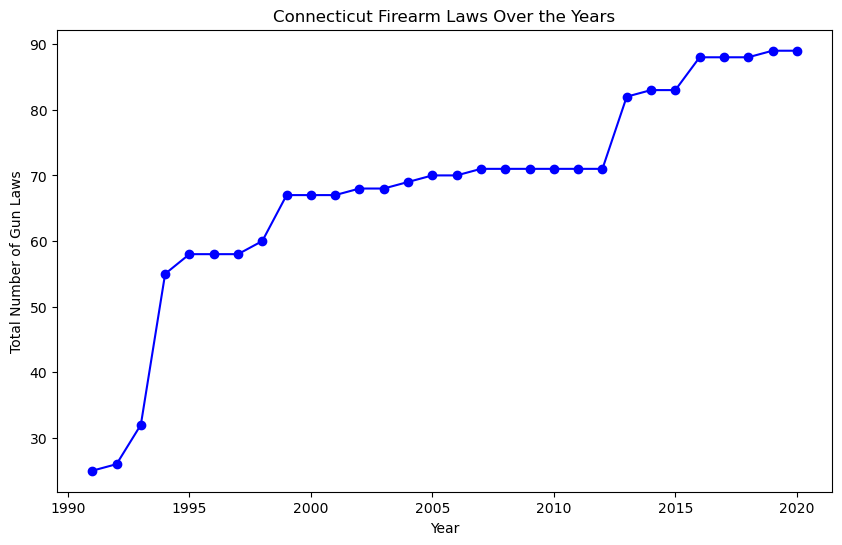

In [90]:
#plotting the line chart
plt.figure(figsize=(10, 6))
plt.plot(CT_data['year'], CT_data['lawtotal'], marker='o', linestyle='-', color='b')

#labels and title
plt.xlabel('Year')
plt.ylabel('Total Number of Gun Laws')
plt.title('Connecticut Firearm Laws Over the Years')

#display plot
plt.show()

In [17]:
data_dict = pd.read_csv('Data Dictionary for State Firearm Laws.csv', encoding='latin-1')

In [18]:
data_dict.head()

,Category Code,Category,Sub-Category,Variable Name,Brief Description of Provision,Detailed Description of Provision,Coding Notes,Coding Instructions,Notes,Data Source and Attribution
0,1,Dealer regulations,Licensing,dealer,State dealer license required for sale of all ...,All firearm dealers are required to have a sta...,State requires all persons engaged in the busi...,If all firearm dealers are required to have a ...,NaN,"Coded by Michael Siegel, MD, MPH, Boston Unive..."
1,1,Dealer regulations,Licensing,dealerh,State dealer license required for sale of hand...,All firearm dealers that sell handguns are req...,State requires all persons engaged in the busi...,If only dealers of handguns or handguns AND as...,NaN,"Coded by Michael Siegel, MD, MPH, Boston Unive..."
2,1,Dealer regulations,Recordkeeping,recordsdealer,Licensed dealers are required to keep and reta...,Licensed dealers are required to keep and reta...,Recordkeeping refers to the recording of sales...,If record keeping and retention is required on...,Federal law requires licensed dealers to keep ...,"Coded by Michael Siegel, MD, MPH, Boston Unive..."
3,1,Dealer regulations,Recordkeeping,recordsdealerh,Licensed dealers are required to keep and reta...,Licensed dealers are required to keep and reta...,Recordkeeping refers to the recording of sales...,If record keeping and retention is required on...,Federal law requires licensed dealers to keep ...,"Coded by Michael Siegel, MD, MPH, Boston Unive..."
4,1,Dealer regulations,Recordkeeping,recordsall,All private sellers and licensed dealers are r...,Both private sellers and licensed dealers are ...,Recordkeeping refers to the recording of sales...,If all private sellers and licensed dealers ar...,Federal law requires licensed dealers to keep ...,"Coded by Michael Siegel, MD, MPH, Boston Unive..."


In [29]:
#data dictionary just on high-risk gun possesion- criminal history, mental health, substance abuse
high_risk_gun_posession = data_dict[data_dict['Category'] == 'Prohibitions for high-risk gun possession']
selected_columns = ['Category Code', 'Category', 'Sub-Category', 'Variable Name', 'Brief Description of Provision']
high_risk_gun_posession[selected_columns]


,Category Code,Category,Sub-Category,Variable Name,Brief Description of Provision
34,3,Prohibitions for high-risk gun possession,Felony,felony,Firearm possession is prohibited for all people with a felony conviction
35,3,Prohibitions for high-risk gun possession,Violent Misdemeanor,violent,Firearm possession is prohibited for people who have committed a violent misdemeanor punishable by less than one year of imprisonment
36,3,Prohibitions for high-risk gun possession,Violent Misdemeanor,violenth,Handgun possession is prohibited for people who have committed a violent misdemeanor punishable by less than one year of imprisonment
37,3,Prohibitions for high-risk gun possession,Violent Misdemeanor,violentpartial,Firearm possession is prohibited for people who have committed a violent misdemeanor punishable by more than one year of imprisonment
38,3,Prohibitions for high-risk gun possession,Mental Health,invcommitment,Firearm possession is prohibited for people who have been involuntarily committed to an inpatient facility
39,3,Prohibitions for high-risk gun possession,Mental Health,invoutpatient,Firearm possession is prohibited for people who have been involuntarily committed to an outpatient facility
40,3,Prohibitions for high-risk gun possession,Mental Health,danger,Firearm possession is prohibited if person is deemed by court to be a danger to oneself or others
41,3,Prohibitions for high-risk gun possession,Drugs,drugmisdemeanor,Firearm possession is prohibited for people with a drug misdemeanor conviction
42,3,Prohibitions for high-risk gun possession,Alcohol,alctreatment,Firearm possession is prohibited for some people with alcohol-related problems
43,3,Prohibitions for high-risk gun possession,Alcohol,alcoholism,Firearm possession is prohibited for some people with alcoholism


We were particularly interested in gaining a better understanding of how individuals with histories of mental health issues, criminal activities, and substance abuse gained access to firearms. All three aspects fall under the 'Prohibitions for high-risk gun possession' category in the dataset. The data below has been sorted for the respective subcategories as well as for the most recent data from 2020. To enhance our comprehension of how this group of people accesses firearms, we need to explore the landscape of gun regulation at the state level and assess the consistency of these regulations

In [55]:
#new df for high-risk gun possesion laws only, made up of 12 sub-categories
high_risk_columns = ['state', 'year','felony', 'violent', 'violenth', 'violentpartial', 'invcommitment', 'invoutpatient', 'danger', 'drugmisdemeanor', 'alctreatment', 'alcoholism', 'relinquishment']
high_risk_df = Firearm_Laws.loc[:, high_risk_columns].copy()

#add new column to sum across rows
numeric_columns = high_risk_df.columns.difference(['state', 'year'])
high_risk_df['sum_of_high_risk'] = high_risk_df[numeric_columns].sum(axis=1)

#to find which state had the most high risk gun laws in 2020
high_risk_2020 = high_risk_df[high_risk_df['year']==2020]
high_risk_2020_sorted = high_risk_2020.sort_values(by= 'sum_of_high_risk', ascending=False)
high_risk_2020_sorted

,state,year,felony,violent,violenth,violentpartial,invcommitment,invoutpatient,danger,drugmisdemeanor,alctreatment,alcoholism,relinquishment,sum_of_high_risk
329,Hawaii,2020,1,1,1,1,1,1,1,1,1,0,1,10
209,Connecticut,2020,1,1,1,1,1,1,1,1,0,0,1,9
149,California,2020,1,1,1,1,1,0,1,0,0,1,1,8
629,Massachusetts,2020,1,0,0,1,1,1,1,1,1,0,1,8
389,Illinois,2020,1,0,0,1,1,1,1,1,0,0,1,7
959,New York,2020,1,0,0,1,1,1,1,1,0,0,1,7
599,Maryland,2020,1,1,1,1,1,0,1,1,0,0,0,7
689,Minnesota,2020,1,0,0,1,1,0,1,1,1,0,0,6
1439,West Virginia,2020,1,0,0,1,1,1,1,0,0,1,0,6
1109,Oregon,2020,1,0,0,1,1,1,1,0,0,0,0,5


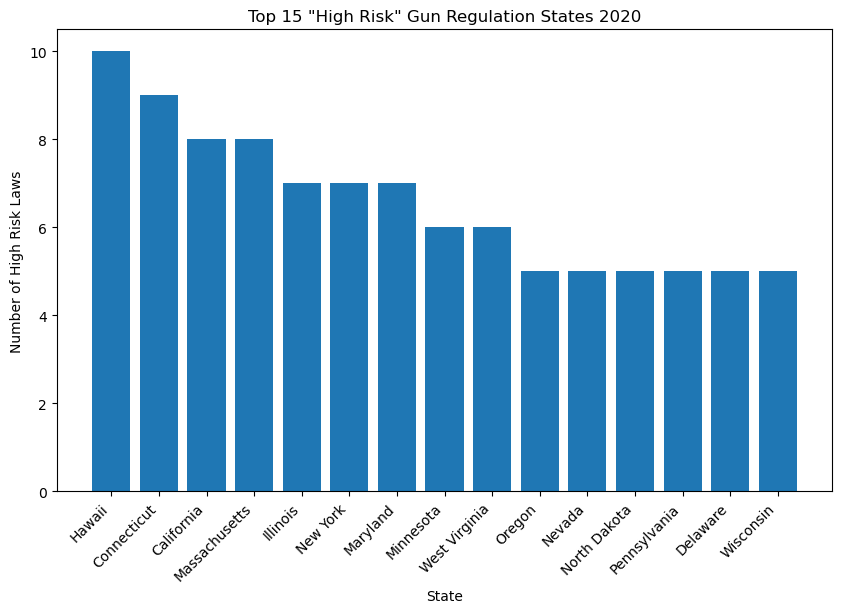

In [59]:
top_15_regulated = high_risk_2020_sorted.head(15)

#plotting bar chart
plt.figure(figsize=(10,6))
plt.bar(top_15_regulated['state'], top_15_regulated['sum_of_high_risk'])
plt.title('Top 15 "High Risk" Gun Regulation States 2020')
plt.xlabel('State')
plt.ylabel('Number of High Risk Laws')
plt.xticks(rotation=45, ha='right')
plt.show()

**Comparing Mental Health, Criminal History, & Substance Abuse**

In this section the analysis was repeated for each subcategory to determine how many laws each state had active in 2020. For Mental Health, Criminal History, and Substance Abuse there are 3, 4, and 2 gun laws pertaining to respectively. 

In [56]:
#isolating gun regulation for mental health
mental_health_sub_category = ['state', 'year','invcommitment', 'invoutpatient', 'danger']
mental_health_df = Firearm_Laws.loc[:, mental_health_sub_category].copy()

#add new column to sum across rows
total_three_columns = mental_health_df.columns.difference(['state', 'year'])
mental_health_df['sum_of_mental_health'] = mental_health_df[total_three_columns].sum(axis=1)

#to find which state had the most mental-health high risk gun laws in 2020
mental_health_2020 = mental_health_df[mental_health_df['year']==2020]
mental_health_2020_sorted = mental_health_2020.sort_values(by= 'sum_of_mental_health', ascending=False)
mental_health_2020_sorted

,state,year,invcommitment,invoutpatient,danger,sum_of_mental_health
1439,West Virginia,2020,1,1,1,3
89,Arizona,2020,1,1,1,3
959,New York,2020,1,1,1,3
1109,Oregon,2020,1,1,1,3
1469,Wisconsin,2020,1,1,1,3
209,Connecticut,2020,1,1,1,3
899,New Jersey,2020,1,1,1,3
1259,Tennessee,2020,1,1,1,3
629,Massachusetts,2020,1,1,1,3
329,Hawaii,2020,1,1,1,3


In [70]:
mental_health_count =mental_health_2020_sorted['sum_of_mental_health'].value_counts()
mental_health_count_table = pd.DataFrame({'Number of Mental Health Gun Laws':mental_health_count.index,'Number of States':mental_health_count.values})
mental_health_count_table_sorted = mental_health_count_table.sort_values(by= 'Number of Mental Health Gun Laws')
print(mental_health_count_table_sorted.to_string(index=False))

 Number of Mental Health Gun Laws  Number of States
                                0                20
                                1                 2
                                2                13
                                3                15


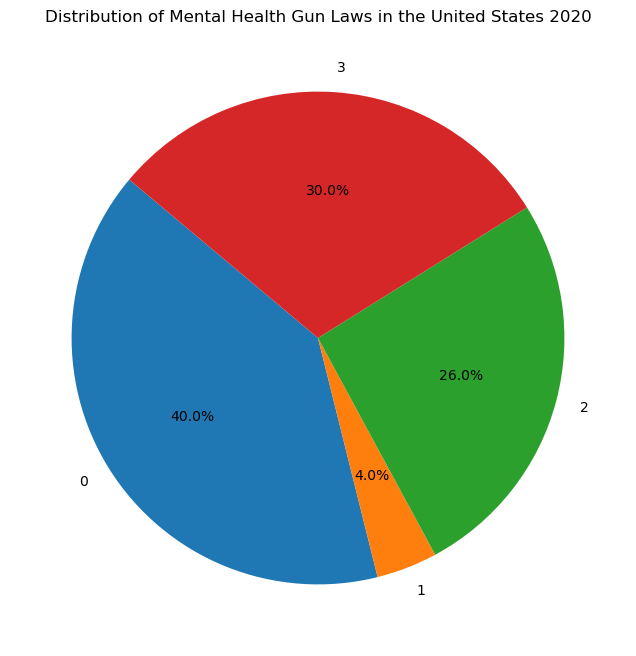

In [92]:
#pie chart of mental_health_count_table
plt.figure(figsize=(8,8))
plt.pie(mental_health_count_table_sorted['Number of States'], labels=mental_health_count_table_sorted['Number of Mental Health Gun Laws'], autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Mental Health Gun Laws in the United States 2020')
plt.show()

A large portion, 40%, of the country had no regulation in place around gun access for those with a mental illness, while 60% had at least 1 gun law in place. Mental health awareness has been increasing in popularity over the past 10 years. As history has shown, there is a lag in legislature around social change. We predict as more attention continues to be drawn to the field of mental health legislature will continue to evolve.  

In [93]:
#isolating gun regulation for criminal history
criminal_hx_sub_category = ['state', 'year','felony', 'violent', 'violenth', 'violentpartial']
criminal_hx_df = Firearm_Laws.loc[:, criminal_hx_sub_category].copy()

#add new column to sum across rows
total_four_columns = criminal_hx_df.columns.difference(['state', 'year'])
criminal_hx_df['sum_of_criminal_hx'] = criminal_hx_df[total_four_columns].sum(axis=1)

#to find which state had the most criminal history high risk gun laws in 2020
criminal_hx_2020 = criminal_hx_df[criminal_hx_df['year']==2020]
criminal_hx_2020_sorted = criminal_hx_2020.sort_values(by= 'sum_of_criminal_hx', ascending=False)
criminal_hx_2020_sorted

,state,year,felony,violent,violenth,violentpartial,sum_of_criminal_hx
329,Hawaii,2020,1,1,1,1,4
599,Maryland,2020,1,1,1,1,4
149,California,2020,1,1,1,1,4
209,Connecticut,2020,1,1,1,1,4
629,Massachusetts,2020,1,0,0,1,2
689,Minnesota,2020,1,0,0,1,2
569,Maine,2020,1,0,0,1,2
959,New York,2020,1,0,0,1,2
1439,West Virginia,2020,1,0,0,1,2
1019,North Dakota,2020,1,0,0,1,2


In [95]:
criminal_hx_count = criminal_hx_2020_sorted['sum_of_criminal_hx'].value_counts()
criminal_hx_count_table = pd.DataFrame({'Number of Criminal History Gun Laws':criminal_hx_count.index,'Number of States':criminal_hx_count.values})
criminal_hx_count_table_sorted = criminal_hx_count_table.sort_values(by= 'Number of Criminal History Gun Laws')
print(criminal_hx_count_table_sorted.to_string(index=False))

 Number of Criminal History Gun Laws  Number of States
                                   0                10
                                   1                27
                                   2                 9
                                   4                 4


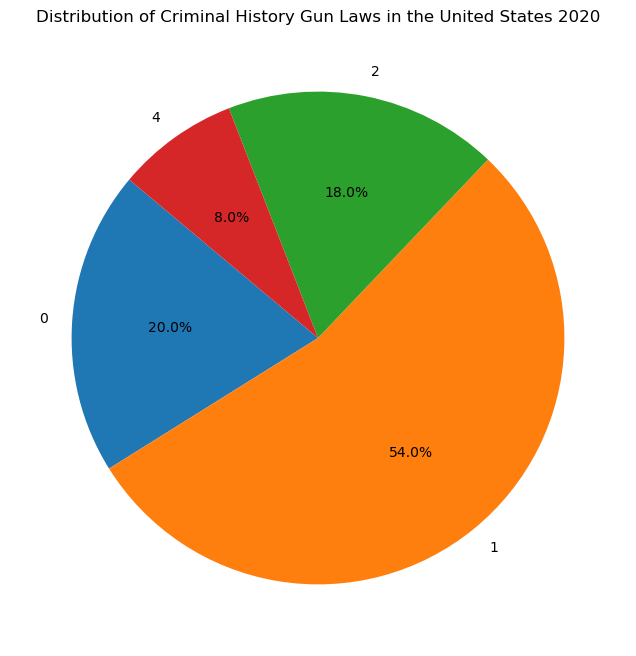

In [98]:
#pie chart of criminal_hx_count_table
plt.figure(figsize=(8,8))
plt.pie(criminal_hx_count_table_sorted['Number of States'], labels=criminal_hx_count_table_sorted['Number of Criminal History Gun Laws'], autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Criminal History Gun Laws in the United States 2020')
plt.show()

The vast majority of the United States, 80%, has a at leats 1 gun law in place regarding criminal history, with only 20% having no regulation.  This was as expected, given the expansive structure of the United States criminal system. It is interesting to note only 8% of states had all 4 possible laws. 

In [94]:
#isolating gun regulation for substance use
substance_sub_category = ['state', 'year','drugmisdemeanor', 'alctreatment', 'alcoholism']
substance_df = Firearm_Laws.loc[:, substance_sub_category].copy()

#add new column to sum across rows
total_sub_columns = substance_df.columns.difference(['state', 'year'])
substance_df['sum_of_substance_laws'] = substance_df[total_sub_columns].sum(axis=1)

#to find which state had the most substance use high risk gun laws in 2020
substance_laws_2020 = substance_df[substance_df['year']==2020]
substance_laws_2020_sorted = substance_laws_2020.sort_values(by= 'sum_of_substance_laws', ascending=False)
substance_laws_2020_sorted

,state,year,drugmisdemeanor,alctreatment,alcoholism,sum_of_substance_laws
689,Minnesota,2020,1,1,0,2
629,Massachusetts,2020,1,1,0,2
329,Hawaii,2020,1,1,0,2
29,Alabama,2020,0,0,1,1
959,New York,2020,1,0,0,1
1019,North Dakota,2020,0,1,0,1
839,Nevada,2020,1,0,0,1
1049,Ohio,2020,0,0,1,1
749,Missouri,2020,0,0,1,1
1139,Pennsylvania,2020,1,0,0,1


In [96]:
substance_law_count = substance_laws_2020_sorted['sum_of_substance_laws'].value_counts()
substance_law_count_table = pd.DataFrame({'Number of Substance Abuse Gun Laws':substance_law_count.index,'Number of States':substance_law_count.values})
substance_law_count_table_sorted = substance_law_count_table.sort_values(by= 'Number of Substance Abuse Gun Laws')
print(substance_law_count_table_sorted.to_string(index=False))

 Number of Substance Abuse Gun Laws  Number of States
                                  0                31
                                  1                16
                                  2                 3


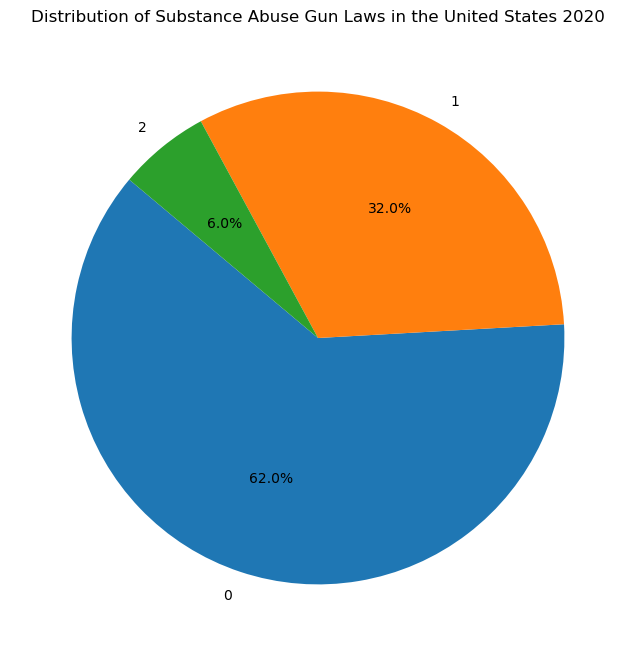

In [97]:
#pie chart of substance_law_count_table
plt.figure(figsize=(8,8))
plt.pie(substance_law_count_table_sorted['Number of States'], labels=substance_law_count_table_sorted['Number of Substance Abuse Gun Laws'], autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Substance Abuse Gun Laws in the United States 2020')
plt.show()

A significant portion, 62%, of the country had no regulation in place around gun access for those with substance abuse, while 38% had at least 1 gun law in place. Similar to mental health awareness, some may argue these two categories could be consolidated; the nuances of substance abuse have only been studied fairly recent in the nation's history. We predict that as more attention continues to be drawn to the field of substance abuse, legislature will continue to evolve, though it most likely will be a slow process. 